In [5]:
# ============================================
# 📘 Netflix Dataset Analysis Project
# ============================================

# Step 1️⃣ — Import Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

%matplotlib inline
sns.set(style="whitegrid")

# Step 2️⃣ — Load Dataset
df = pd.read_csv("/content/Netflix Dataset 1.csv")

# Step 3️⃣ — Basic Overview
print("✅ Dataset Shape:", df.shape)
df.head()


✅ Dataset Shape: (7789, 11)


,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [6]:
# Step 4️⃣ — Dataset Information
df.info()
print("\nMissing Values:\n", df.isnull().sum())

# Handle Missing Values
df['Country'].fillna('Unknown', inplace=True)
df['Director'].fillna('Unknown', inplace=True)
df['Cast'].fillna('Unknown', inplace=True)
df['Rating'].fillna('Not Rated', inplace=True)

# Remove Duplicates
df.drop_duplicates(inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB

Missing Values:
 Show_Id            0
Category           0
Title              0
Director        2388
Cast             718
Country          507
Release_Date      10
Rating             7
Duration           0
Type               0
Description        0
dtype: int64


/tmp/ipython-input-89980050.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Country'].fillna('Unknown', inplace=True)
/tmp/ipython-input-89980050.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df

In [7]:
# Step 5️⃣ — Preprocessing
# Convert Release_Date to datetime
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')

# Extract Year from Release_Date
df['Year'] = df['Release_Date'].dt.year

print("Year column added successfully!")
df[['Title', 'Year']].head()


Year column added successfully!


,Title,Year
0,3%,2020.0
1,07:19,2016.0
2,23:59,2018.0
3,9,2017.0
4,21,2020.0


/tmp/ipython-input-663697371.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Category', data=df, palette='viridis')


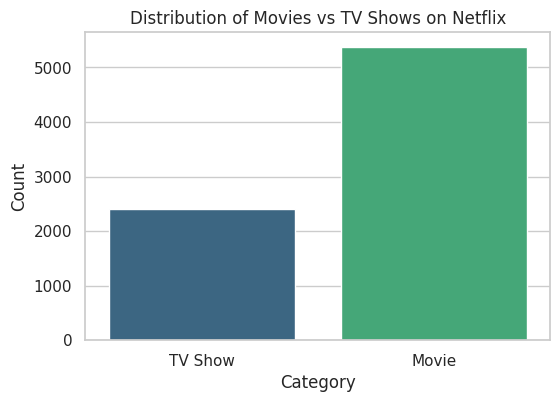

,count
Category,
Movie,5377
TV Show,2410


In [8]:
# Step 6️⃣ — Distribution of Movies vs TV Shows
plt.figure(figsize=(6,4))
sns.countplot(x='Category', data=df, palette='viridis')
plt.title("Distribution of Movies vs TV Shows on Netflix")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()

df['Category'].value_counts()


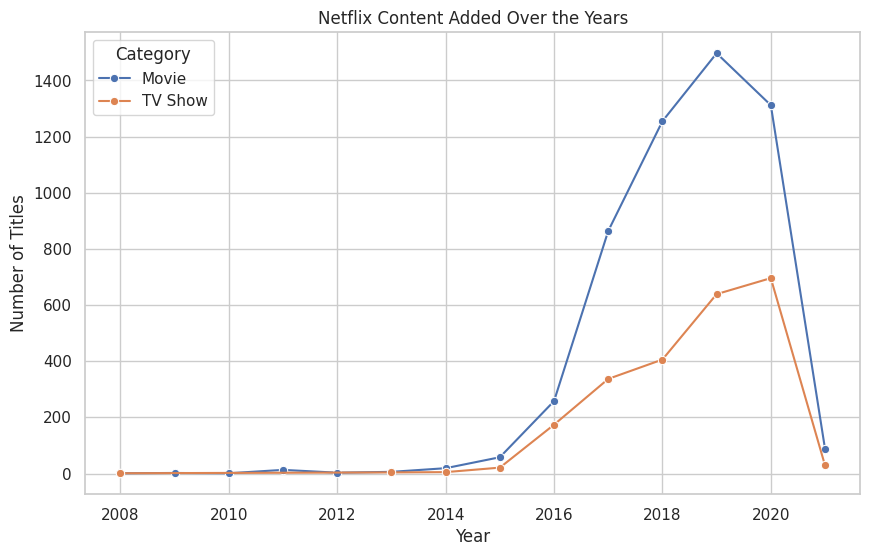

In [9]:
# Step 7️⃣ — Trend of Content Over the Years
content_trend = df.groupby(['Year', 'Category']).size().reset_index(name='Count')

plt.figure(figsize=(10,6))
sns.lineplot(x='Year', y='Count', hue='Category', data=content_trend, marker='o')
plt.title("Netflix Content Added Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.show()


/tmp/ipython-input-583542358.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='coolwarm')


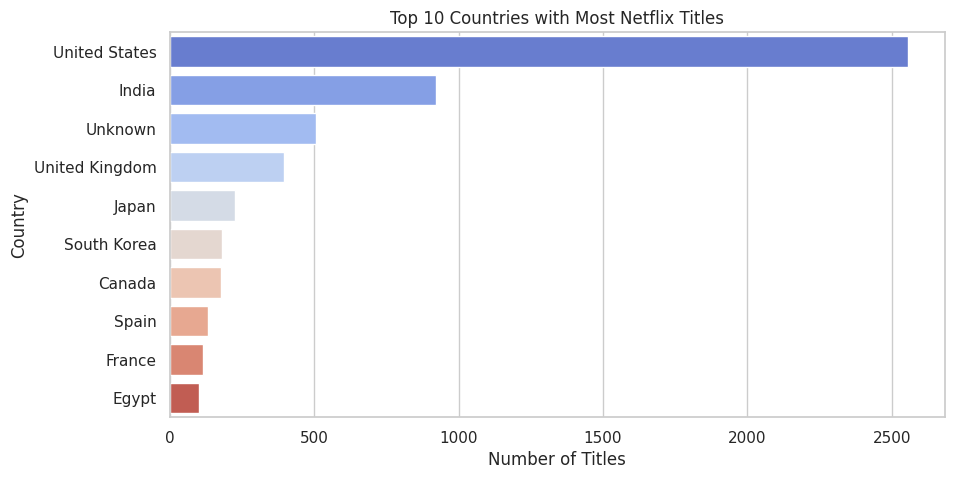

In [10]:
# Step 8️⃣ — Top 10 Countries by Content Count
top_countries = df['Country'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='coolwarm')
plt.title("Top 10 Countries with Most Netflix Titles")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.show()


/tmp/ipython-input-1375138489.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Genre', data=genre_count, palette='magma')


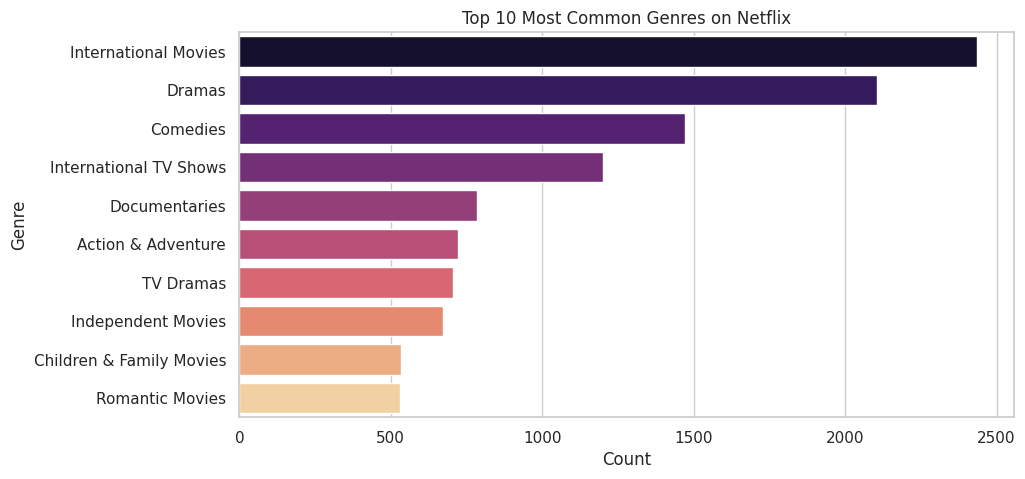

In [11]:
# Step 9️⃣ — Most Common Genres (from 'Type' column)
genre_list = []
for i in df['Type'].dropna():
    genre_list.extend([x.strip() for x in i.split(',')])

genre_count = pd.DataFrame(Counter(genre_list).most_common(10), columns=['Genre','Count'])

plt.figure(figsize=(10,5))
sns.barplot(x='Count', y='Genre', data=genre_count, palette='magma')
plt.title("Top 10 Most Common Genres on Netflix")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()


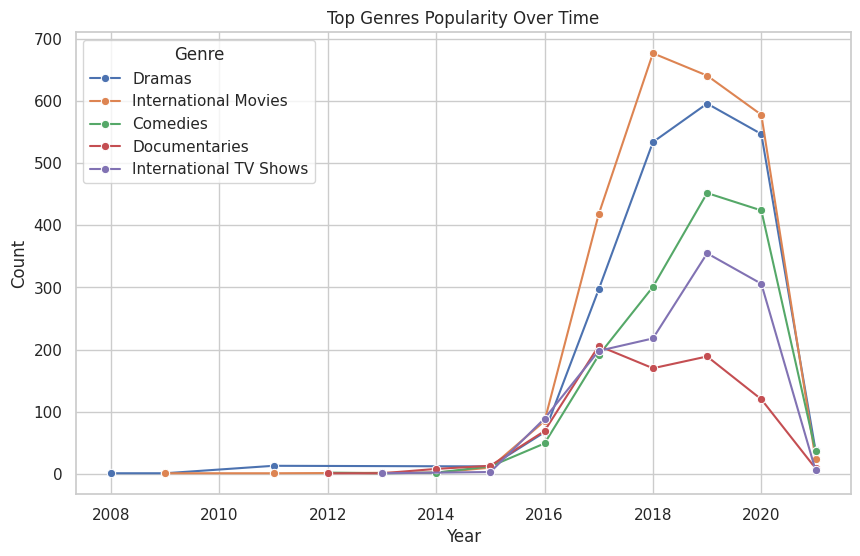

In [12]:
# Step 🔟 — Genre Popularity Over Time
df_exploded = df.assign(Genre=df['Type'].str.split(',')).explode('Genre')
df_exploded['Genre'] = df_exploded['Genre'].str.strip()

top_genres = df_exploded['Genre'].value_counts().head(5).index
trend_data = df_exploded[df_exploded['Genre'].isin(top_genres)].groupby(['Year','Genre']).size().reset_index(name='Count')

plt.figure(figsize=(10,6))
sns.lineplot(x='Year', y='Count', hue='Genre', data=trend_data, marker='o')
plt.title("Top Genres Popularity Over Time")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()


In [13]:
# Step 11️⃣ — Key Insights Summary
print("✅ Total Titles:", len(df))
print("✅ Movies:", len(df[df['Category']=='Movie']))
print("✅ TV Shows:", len(df[df['Category']=='TV Show']))
print("✅ Most Represented Country:", df['Country'].value_counts().idxmax())
print("✅ Most Common Genre:", genre_count.iloc[0,0])


✅ Total Titles: 7787
✅ Movies: 5377
✅ TV Shows: 2410
✅ Most Represented Country: United States
✅ Most Common Genre: International Movies
